<h1>Лабораторная работа №7</h1>

In [8]:
from sklearn.datasets import fetch_20newsgroups

categories = ['rec.autos', 'comp.graphics', 'sci.med', 'talk.politics.mideast']
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

documents = dataset.data
print(f"Загружено {len(documents)} документов.")

Загружено 3893 документов.


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stop_words = list(ENGLISH_STOP_WORDS)

tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, stop_words=custom_stop_words, max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

print(f"Размерность матрицы TF-IDF: {tfidf_matrix.shape}")


Размерность матрицы TF-IDF: (3893, 10000)


In [10]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=25, random_state=42, learning_method='batch')
lda_model.fit(tfidf_matrix)

LatentDirichletAllocation(max_iter=25, random_state=42)

In [11]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Тема {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, 10)

Тема 1:
graphics image 3d files file program thanks gif format images

Тема 2:
angmar cosmo jpl pro tsiel bezier ohayon alfalfa kevinh carl

Тема 3:
msg dyer food geico spdcc rind sensitivity sas uga chinese

Тема 4:
columbia armenia azerbaijan saturn armenians cunixb zisfein unisql turkish azeri

Тема 5:
howell centerline ati bham goucher ibm3090 salah jimf clutchless frost

Тема 6:
pitt banks geb gordon skepticism intellect chastity n3jxp cadre dsl

Тема 7:
armenian turkish armenians argic serdar turks armenia zuma genocide soviet

Тема 8:
714 dresden almanac edwards needles tu inf adelaide beck askew

Тема 9:
edu com article writes car university just don people like

Тема 10:
photography krillean cview navy kirlian umich engin diesels mil dt



In [12]:
document_topics = lda_model.transform(tfidf_matrix)

for i, doc_topics in enumerate(document_topics[:5]):
    print(f"Документ {i + 1}:")
    for topic_idx, topic_weight in enumerate(doc_topics):
        print(f"  Тема {topic_idx + 1}: {topic_weight:.4f}")
    print()

Документ 1:
  Тема 1: 0.5093
  Тема 2: 0.0125
  Тема 3: 0.0125
  Тема 4: 0.0125
  Тема 5: 0.0125
  Тема 6: 0.0125
  Тема 7: 0.0125
  Тема 8: 0.0125
  Тема 9: 0.3910
  Тема 10: 0.0125

Документ 2:
  Тема 1: 0.0172
  Тема 2: 0.0172
  Тема 3: 0.0172
  Тема 4: 0.0172
  Тема 5: 0.0172
  Тема 6: 0.0172
  Тема 7: 0.2040
  Тема 8: 0.0172
  Тема 9: 0.6581
  Тема 10: 0.0172

Документ 3:
  Тема 1: 0.0141
  Тема 2: 0.0141
  Тема 3: 0.0141
  Тема 4: 0.0668
  Тема 5: 0.0141
  Тема 6: 0.0141
  Тема 7: 0.0141
  Тема 8: 0.0141
  Тема 9: 0.8200
  Тема 10: 0.0141

Документ 4:
  Тема 1: 0.0124
  Тема 2: 0.0124
  Тема 3: 0.0124
  Тема 4: 0.0810
  Тема 5: 0.0124
  Тема 6: 0.0568
  Тема 7: 0.0124
  Тема 8: 0.0124
  Тема 9: 0.7756
  Тема 10: 0.0124

Документ 5:
  Тема 1: 0.0157
  Тема 2: 0.0157
  Тема 3: 0.0157
  Тема 4: 0.2320
  Тема 5: 0.0157
  Тема 6: 0.0157
  Тема 7: 0.0157
  Тема 8: 0.0157
  Тема 9: 0.6422
  Тема 10: 0.0157



In [13]:
documents = [
    "This movie was absolutely fantastic! The story was engaging and the actors were superb.",
    "I found this film to be boring and too long. The plot was not interesting.",
    "The special effects in this movie are stunning, but the story is quite weak.",
    "Great comedy! I laughed so much during the entire film.",
    "The horror elements were chilling, but the ending was disappointing.",
    "A masterpiece of cinematography. Brilliant direction and outstanding performances.",
    "The script was poorly written, and the pacing was all over the place.",
    "This film had a lot of action and kept me on the edge of my seat!",
    "An emotional rollercoaster that left me in tears. Highly recommend!",
    "The soundtrack was amazing, but the story lacked depth.",
    "A thrilling adventure with lots of unexpected twists.",
    "This documentary was very informative and eye-opening.",
    "The romance was cheesy and predictable, but it was still enjoyable.",
    "I couldn't stop laughing. One of the best comedies I've seen!",
    "The movie was too dark and hard to follow at times.",
    "A visually stunning film with breathtaking cinematography.",
    "The characters were well-developed and relatable.",
    "I didn't like this movie at all. It was a waste of time.",
    "The historical aspect was very well portrayed. Truly inspiring!",
    "An absolute disaster. Everything about this movie was bad."
]

In [14]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stop_words = list(ENGLISH_STOP_WORDS) + ["movie", "film", "story"]

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(1, 3), max_features=1000)
X = vectorizer.fit_transform(documents)

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=25, random_state=42, learning_method='batch')
lda.fit(X)

LatentDirichletAllocation(max_iter=25, n_components=5, random_state=42)

In [17]:
def print_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Тема {topic_idx + 1}:")
        print(" ".join([words[i] for i in topic.argsort()[:-top_n - 1:-1]]))
        print()

print_topics(lda, vectorizer)

Тема 1:
opening documentary informative documentary informative eye informative informative eye informative eye opening eye eye opening documentary hard

Тема 2:
relatable developed characters developed developed relatable characters developed relatable characters cheesy predictable enjoyable cheesy predictable enjoyable predictable enjoyable

Тема 3:
soundtrack amazing lacked soundtrack amazing soundtrack amazing lacked depth lacked depth amazing lacked depth amazing lacked special effects

Тема 4:
visually stunning visually stunning breathtaking visually stunning breathtaking stunning breathtaking cinematography breathtaking cinematography breathtaking great comedy laughed great great comedy

Тема 5:
absolute disaster bad absolute absolute disaster bad disaster disaster bad boring long interesting long plot



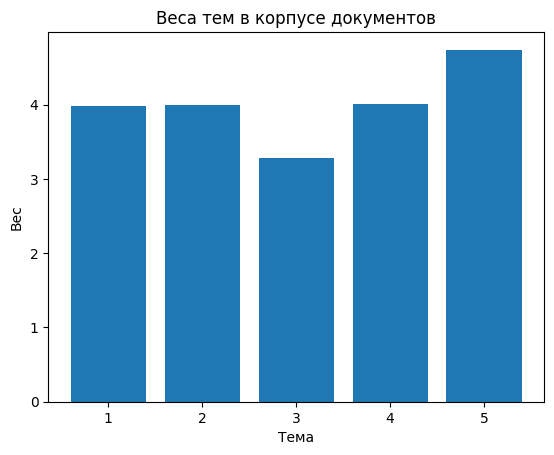

In [18]:
import numpy as np
import matplotlib.pyplot as plt

document_topics = lda.transform(X)
topic_weights = np.sum(document_topics, axis=0)

plt.bar(range(1, n_topics + 1), topic_weights)
plt.xlabel("Тема")
plt.ylabel("Вес")
plt.title("Веса тем в корпусе документов")
plt.show()